# Loading the Dataset
Link to google drive

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import sqlite3
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import warnings
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.impute import SimpleImputer
import graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%ls
%pwd

drive/  sample_data/


'/content'

load the file from the google drive

In [ ]:
found_file = False
# Propp's
try:
  with open('/content/drive/MyDrive/Fall2023/MachineLearning/database.sqlite', 'r') as f:
    print("found file")
    found_file = True
except FileNotFoundError:
  pass
# Eli
if(not found_file):
  try:
    with open('/content/drive/MyDrive/Fall2023/MachineLearning/database.sqlite', 'r') as f:
      print("found file")
      found_file = True
  except FileNotFoundError:
    pass
# Sabina
if(not found_file):
  try:
    with open('/content/drive/MyDrive/soccer database/database.sqlite', 'r') as f:
      print("found file")
      found_file = True
  except FileNotFoundError:
    pass

if(not found_file):
  print("Failed to find file in google drive")

found file


In [ ]:
from sqlite3.dbapi2 import OperationalError
open_file = False
if (not open_file):
  try:
    con = sqlite3.connect('/content/drive/MyDrive/Fall2023/MachineLearning/database.sqlite')
    open_file = True
  except OperationalError:
    pass
if (not open_file):
  try:
    con = sqlite3.connect('/content/drive/MyDrive/soccer database/database.sqlite')
    open_file = True
  except OperationalError:
    pass




matches = pd.read_sql_query("SELECT * FROM Match",con)

players = pd.read_sql("SELECT * FROM Player;", con)

teams = pd.read_sql("SELECT * FROM Team_Attributes;", con)

In [ ]:
players[players["player_api_id"] == matches["away_player_10"][25977]]

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
1771,1774,92252,Christian Schneuwly,184285,1988-02-07 00:00:00,177.8,161


In [ ]:
binary_class_label = "home_team_win"
binary_class_label_complement = "away_team_win"
matches[binary_class_label] = np.where(matches["home_team_goal"] - matches["away_team_goal"] > 0, 1, 0)
matches[binary_class_label_complement] = np.where(matches["home_team_win"] == 0, 1, 0)

In [ ]:
num_home_wins = np.count_nonzero(matches["home_team_win"] == 1)
print(f"Percentage of home wins: {round(num_home_wins / matches.shape[0] * 100, 2)}%")

Percentage of home wins: 45.87%


In [ ]:
matches



,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,home_team_win,away_team_win
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,0,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,0,1
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,0,1
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,1,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1


In [ ]:
odds_features = ['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA']
odds_data = matches[odds_features + [binary_class_label]].dropna()

odds_data


,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,...,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,home_team_win
997,2.38,3.25,3.00,2.45,3.30,2.70,2.30,3.1,2.60,2.38,...,2.40,3.40,2.90,2.45,3.30,2.70,2.40,3.25,2.70,0
998,1.80,3.60,4.33,1.75,3.70,4.20,1.80,3.2,3.70,1.73,...,1.80,3.60,4.50,1.75,3.70,4.20,1.80,3.50,4.00,1
999,1.65,3.80,5.00,1.67,3.60,5.00,1.65,3.3,4.40,1.67,...,1.70,3.70,5.00,1.67,3.60,5.00,1.70,3.50,4.50,0
1000,1.50,4.00,7.00,1.53,3.90,6.00,1.50,3.7,5.00,1.50,...,1.57,3.90,6.00,1.53,3.90,6.00,1.50,3.80,6.00,1
1001,1.29,5.25,10.00,1.25,5.50,10.00,1.25,4.5,9.00,1.25,...,1.25,5.50,12.00,1.25,5.50,10.00,1.25,5.50,9.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23412,2.00,3.40,3.75,2.00,3.20,3.90,1.85,3.5,3.95,1.90,...,2.05,3.50,3.90,2.00,3.20,3.90,2.00,3.40,3.50,1
23413,3.00,3.25,2.38,3.30,3.20,2.35,2.90,3.3,2.30,2.88,...,3.20,3.40,2.38,3.30,3.20,2.35,2.88,3.30,2.38,1
23414,8.00,4.50,1.40,8.75,4.75,1.40,7.60,4.8,1.35,8.00,...,9.00,5.25,1.36,8.75,4.75,1.40,8.50,4.50,1.36,0
23415,1.91,3.50,4.00,1.90,3.40,4.00,2.00,3.3,3.60,1.95,...,1.95,3.60,4.20,1.90,3.40,4.00,1.91,3.50,3.75,0


In [ ]:
odds_rf = RandomForestClassifier(oob_score=True)
X_train, X_test, y_train, y_test = train_test_split(odds_data[odds_features], odds_data["home_team_win"], test_size=0.2)
X_train

,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
3325,1.80,3.60,4.50,1.78,3.50,4.50,1.85,3.45,4.00,1.83,...,4.33,1.85,3.6,4.8,1.78,3.50,4.50,1.83,3.50,4.33
23282,2.50,3.40,2.70,2.55,3.30,2.70,2.50,3.30,2.65,2.37,...,2.80,2.55,3.4,2.9,2.55,3.30,2.70,2.50,3.30,2.62
14585,1.44,4.20,7.50,1.40,4.10,7.00,1.40,4.00,6.50,1.40,...,7.50,1.45,4.5,7.5,1.40,4.10,7.00,1.44,4.33,6.50
12040,1.95,3.50,3.75,1.90,3.80,3.60,2.00,3.30,3.30,1.95,...,3.80,1.95,3.9,3.8,1.90,3.80,3.60,1.95,3.75,3.50
11817,2.10,3.25,3.60,2.10,3.25,3.50,2.00,3.30,3.60,2.15,...,3.50,2.25,3.3,3.6,2.10,3.25,3.50,2.10,3.20,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3452,1.85,3.80,4.50,1.80,3.50,4.50,1.90,3.45,3.80,1.90,...,4.33,1.90,3.7,4.3,1.80,3.50,4.50,1.83,3.40,4.50
20787,2.00,3.60,3.50,2.00,3.25,3.40,1.75,3.40,4.00,2.00,...,3.60,2.00,3.8,3.5,2.00,3.25,3.40,2.00,3.50,3.50
6486,2.05,3.20,3.80,2.10,3.10,3.75,2.00,3.25,3.70,2.05,...,3.60,2.10,3.3,4.1,2.10,3.10,3.75,2.10,3.20,3.60
11847,1.33,5.00,8.50,1.35,4.75,8.75,1.37,4.60,7.50,1.40,...,9.00,1.36,5.0,10.0,1.35,4.75,8.75,1.36,4.75,9.00


In [ ]:
odds_rf.fit(X_train, y_train)
score = odds_rf.score(X_test, y_test)
y_pred_proba = odds_rf.predict_proba(X_test)
home_team_win_prob = y_pred_proba[:, 1]
#Prints probabilities of home team winning
print(home_team_win_prob)
print(score)

[0.39 0.51 0.35 0.59 0.2  0.1  0.59 0.55 0.57 0.4  0.32 0.42 0.55 0.24
 0.47 0.33 0.   0.5  0.81 0.48 0.39 0.27 0.01 0.43 0.79 0.11 0.76 0.79
 0.93 0.64 0.56 0.43 0.51 0.07 0.32 0.36 0.43 0.39 0.26 0.34 0.47 0.52
 0.75 0.44 0.07 0.94 0.4  0.58 0.5  0.79 0.3  0.48 0.4  0.74 0.57 0.3
 0.59 0.15 0.36 0.29 0.25 0.46 0.23 0.71 0.65 0.27 0.56 0.36 0.38 0.44
 0.8  0.03 0.3  0.42 0.16 0.31 0.38 0.7  0.38 0.74 0.48 0.32 0.43 0.21
 0.28 0.38 0.41 0.24 0.95 0.39 0.41 0.58 0.49 0.96 0.41 0.09 0.81 0.51
 0.23 0.57 0.21 0.66 0.33 0.27 0.48 0.49 0.5  0.49 0.42 0.47 0.59 0.61
 0.31 0.48 0.47 0.42 0.75 0.23 0.33 0.97 0.35 0.39 0.8  0.72 0.54 0.51
 0.51 0.27 0.32 0.79 0.3  0.39 0.88 0.31 0.48 0.02 0.82 0.56 0.4  0.31
 0.51 0.27 0.78 0.48 0.11 0.5  0.57 0.5  0.97 0.45 0.2  0.41 0.23 0.15
 0.6  0.33 0.43 0.73 0.14 0.53 0.24 0.55 0.18 0.55 0.39 0.04 0.29 0.38
 0.56 0.34 0.5  0.29 0.05 0.5  0.43 0.93 0.06 0.52 0.4  0.76 0.57 0.45
 0.59 0.42 0.2  0.38 0.26 0.53 0.28 0.27 0.16 0.87 0.37 0.56 0.21 0.97
 0.62 0

In [ ]:
odds_rf.oob_score_

0.6102540834845736

In [ ]:
y_pred = odds_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6539855072463768


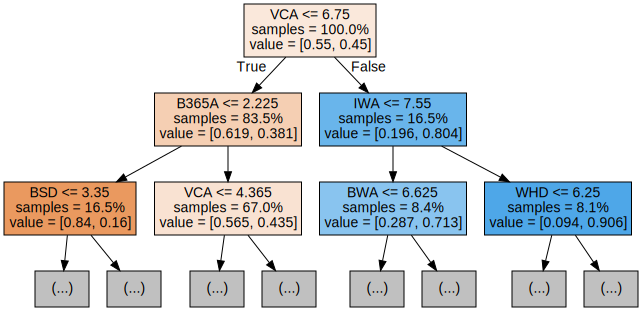

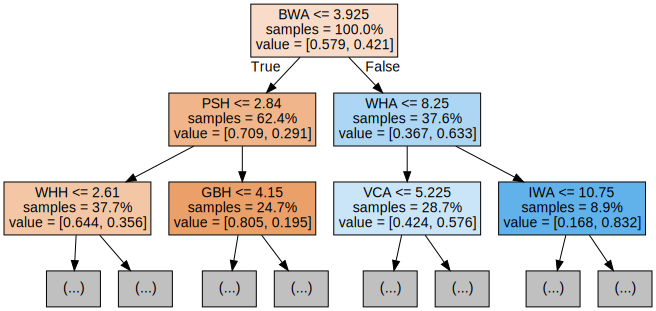

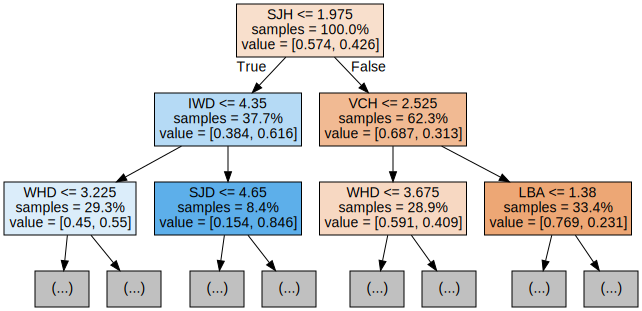

In [ ]:
for i in range(3):
    tree = odds_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 6, 'n_estimators': 438}


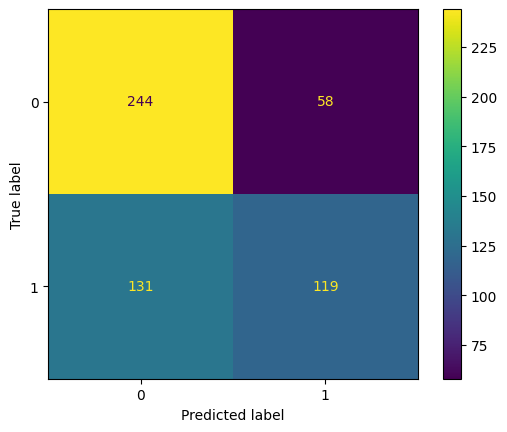

In [ ]:
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.657608695652174
Precision: 0.672316384180791
Recall: 0.476


Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

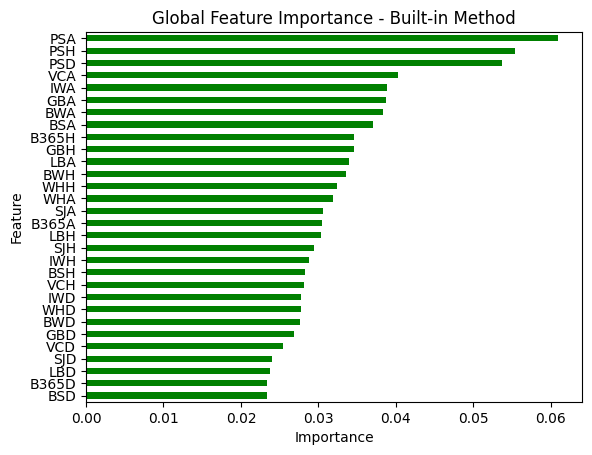

In [ ]:
global_importances = pd.Series(odds_rf.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

<Axes: >

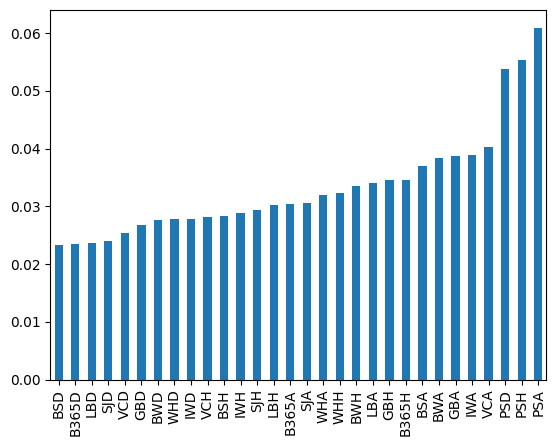

In [ ]:
global_importances.plot.bar()

In [ ]:
top_k = len(odds_features) # the number of top features to select

train_error = []
test_error = []
num_features = list(range(1, top_k))
for k in num_features:
    top_k_features = list(global_importances.head(k)["feature_name"])
    top_k_odds_rf = RandomForestClassifier(odds_data[top_k_features + [binary_class_label]], top_k_features, suppress_print=True)
    tr_err, te_err = train_test_error(top_k_odds_rf, top_k_features, suppress_print=True)
    train_error.append(tr_err)
    test_error.append(te_err)

plot_errors(train_error, test_error, num_features)

KeyError: ignored

In [ ]:
most_important = ["PSD", "PSH", "PSA", "WHH"]
better_odds_data = matches[most_important + [binary_class_label]].dropna()
better_odds_rf = RandomForestClassifier(oob_score=True)
X_train, X_test, y_train, y_test = train_test_split(better_odds_data[most_important], better_odds_data["home_team_win"], test_size=0.2)
better_odds_rf.fit(X_train, y_train)
score = better_odds_rf.score(X_test, y_test)
print(score)
y_pred = better_odds_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

0.6139722346618899
Accuracy: 0.6139722346618899


In [ ]:
goal_rf = RandomForestClassifier(oob_score=True)
home_goal = ["home_team_goal", "away_team_goal"]

goal_data = matches[home_goal].dropna()
X_train, X_test, y_train, y_test = train_test_split(goal_data, matches["home_team_win"], test_size=0.2)

In [ ]:
goal_rf.fit(X_train, y_train)
goal_rf.oob_score_
y_pred = goal_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
rand_rf = RandomForestClassifier(oob_score=True)
feat = ['shoton', 'shotoff', 'goal', 'foulcommit', 'card', 'cross', 'corner', 'possession']
rand_data = matches[feat + [binary_class_label]].dropna()

X_train, X_test, y_train, y_test = train_test_split(rand_data[feat], rand_data[binary_class_label], test_size=0.2)
rand_data

,shoton,shotoff,goal,foulcommit,card,cross,corner,possession,home_team_win
1728,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<goal><value><comment>n</comment><stats><goals...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>56</comment><event...,0
1729,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<goal><value><comment>n</comment><stats><goals...,<foulcommit><value><stats><foulscommitted>1</f...,<card />,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>65</comment><event...,1
1730,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<goal><value><comment>n</comment><stats><goals...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>45</comment><event...,0
1731,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<goal><value><comment>n</comment><stats><goals...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>50</comment><event...,1
1732,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<goal><value><comment>n</comment><stats><goals...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><corners>1</corners></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>51</comment><event...,1
...,...,...,...,...,...,...,...,...,...
25944,<shoton />,<shotoff />,<goal><value><comment>o</comment><stats><owngo...,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,0
25945,<shoton />,<shotoff />,<goal><value><comment>n</comment><stats><goals...,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,1
25946,<shoton />,<shotoff />,<goal><value><comment>n</comment><stats><goals...,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,0
25947,<shoton />,<shotoff />,<goal><value><comment>n</comment><stats><goals...,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,0


In [ ]:
#rand_rf.fit(X_train, y_train)
#rand_rf.oob_score_

FIFA Attributes

In [ ]:
team_attributes = pd.read_sql("SELECT * FROM Team_Attributes;", con)

In [ ]:
buildup_features = ["buildUpPlaySpeed", "buildUpPlayDribbling", "buildUpPlayPassing"]
chance_creation_features = ["chanceCreationPassing", "chanceCreationCrossing", "chanceCreationShooting"]
defence_features = ["defencePressure", "defenceAggression", "defenceTeamWidth"]
categories = [buildup_features, chance_creation_features, defence_features]

aggregations = ["mean", "min", "max", "median"]

all_attr_features = []
for category in categories:
    all_attr_features += category

all_attr_features_agg = []
categories_agg = []
for category in categories:
    category_agg = []
    for agg in aggregations:
        for feature in category:
            formatted_feature_name = f"{feature}_{agg}"
            category_agg.append(formatted_feature_name)
            all_attr_features_agg.append(formatted_feature_name)
    categories_agg.append(category_agg)

len(all_attr_features_agg)

36

In [ ]:
aggregated_attributes = team_attributes.groupby("team_api_id").agg(
    {feature : [(f"{feature}_{agg}", agg) for agg in aggregations]for feature in all_attr_features}
).reset_index(col_level = 1).droplevel(level = 0, axis = 1)[["team_api_id"] + all_attr_features_agg]

aggregated_attributes.head()

,team_api_id,buildUpPlaySpeed_mean,buildUpPlayDribbling_mean,buildUpPlayPassing_mean,buildUpPlaySpeed_min,buildUpPlayDribbling_min,buildUpPlayPassing_min,buildUpPlaySpeed_max,buildUpPlayDribbling_max,buildUpPlayPassing_max,...,defenceTeamWidth_mean,defencePressure_min,defenceAggression_min,defenceTeamWidth_min,defencePressure_max,defenceAggression_max,defenceTeamWidth_max,defencePressure_median,defenceAggression_median,defenceTeamWidth_median
0,1601,47.333333,48.0,46.166667,30,48.0,38,53,48.0,55,...,49.333333,43,44,49,65,60,50,43.0,44.0,49.0
1,1773,52.000000,51.0,50.000000,52,51.0,50,52,51.0,50,...,50.000000,43,44,50,43,44,50,43.0,44.0,50.0
2,1957,47.166667,54.0,52.666667,30,54.0,38,66,54.0,69,...,53.666667,32,50,49,70,70,70,48.5,56.0,51.0
3,2033,49.000000,62.0,48.400000,45,62.0,40,65,62.0,55,...,45.400000,37,24,35,50,45,60,37.0,31.0,44.0
4,2182,60.333333,52.5,49.000000,40,50.0,35,67,55.0,57,...,54.500000,47,37,45,60,58,63,48.5,47.0,55.5


In [ ]:
def attribute_matchup(dataset, home_id, away_id):
    """
    Computes the matchup features for the home_id and away_id.
    """
    home = dataset[dataset["team_api_id"] == home_id][all_attr_features_agg].to_numpy()
    away = dataset[dataset["team_api_id"] == away_id][all_attr_features_agg].to_numpy()
    if len(home) == 0 or len(away) == 0:
        # Team not present, no matchup possible
        return pd.Series([np.nan] * len(all_attr_features_agg), index = all_attr_features_agg)
    diff = (home - away)[0]
    return pd.Series(diff, index = all_attr_features_agg)

In [ ]:
attr_data = matches.copy()
attr_data[all_attr_features_agg] = attr_data.apply(lambda x: attribute_matchup(aggregated_attributes, x["home_team_api_id"], x["away_team_api_id"]), axis = 1, result_type = "expand")

In [ ]:
attr_data = attr_data.dropna()

In [ ]:
attr_rf = RandomForestClassifier(oob_score=True)
X_train, X_test, y_train, y_test = train_test_split(attr_data[all_attr_features_agg], attr_data[binary_class_label], test_size=0.2)
attr_rf.fit(X_train, y_train)
score = attr_rf.score(X_test, y_test)
print(score)
path = attr_rf.decision_path(X_train)
print(path)
y_pred = attr_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

0.6402266288951841
(<1409x46670 sparse matrix of type '<class 'numpy.int64'>'
	with 1676838 stored elements in Compressed Sparse Row format>, array([    0,   447,   906,  1385,  1880,  2341,  2814,  3273,  3762,
        4187,  4654,  5143,  5610,  6097,  6564,  7053,  7518,  7953,
        8414,  8857,  9314,  9759, 10228, 10681, 11136, 11617, 12092,
       12549, 13042, 13507, 13978, 14445, 14912, 15381, 15836, 16311,
       16800, 17237, 17700, 18131, 18590, 19073, 19576, 20063, 20496,
       20977, 21436, 21907, 22344, 22807, 23280, 23717, 24194, 24661,
       25154, 25621, 26068, 26547, 26994, 27441, 27902, 28367, 28850,
       29297, 29722, 30195, 30688, 31119, 31562, 32021, 32496, 32967,
       33454, 33929, 34384, 34883, 35358, 35805, 36278, 36769, 37260,
       37739, 38214, 38691, 39156, 39625, 40074, 40557, 41030, 41507,
       42006, 42501, 42968, 43457, 43922, 44417, 44880, 45311, 45766,
       46209, 46670]))
Accuracy: 0.6402266288951841


Text(0.5, 1.0, 'Global Feature Importance')

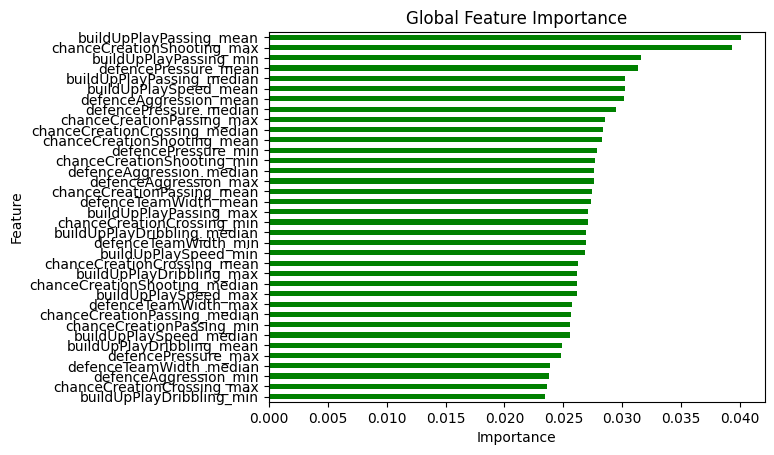

In [ ]:
global_importances = pd.Series(attr_rf.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance")

In [ ]:
attr_data

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,defenceTeamWidth_mean,defencePressure_min,defenceAggression_min,defenceTeamWidth_min,defencePressure_max,defenceAggression_max,defenceTeamWidth_max,defencePressure_median,defenceAggression_median,defenceTeamWidth_median
3248,3249,1729,1729,2012/2013,1,2012-08-18 00:00:00,1228229,9825,8472,0,...,-1.333333,-5.0,2.0,10.0,17.0,-13.0,-13.0,5.0,-8.5,1.0
3249,3250,1729,1729,2012/2013,1,2012-08-20 00:00:00,1228230,8668,10260,1,...,1.500000,0.0,3.0,0.0,1.0,17.0,-5.0,7.5,8.5,3.5
3250,3251,1729,1729,2012/2013,1,2012-08-18 00:00:00,1228231,9879,9850,5,...,-4.666667,-5.0,-11.0,-3.0,-15.0,-31.0,-8.0,-1.5,-11.5,-6.0
3251,3252,1729,1729,2012/2013,1,2012-08-19 00:00:00,1228232,8456,8466,3,...,2.833333,-1.0,1.0,1.0,-5.0,-5.0,-16.0,-7.0,-12.5,10.0
3252,3253,1729,1729,2012/2013,1,2012-08-18 00:00:00,1228233,10261,8586,2,...,-6.666667,11.0,-1.0,-8.0,-7.0,4.0,-9.0,-9.0,-4.0,-5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23412,23413,21518,21518,2012/2013,9,2012-10-28 00:00:00,1260116,8581,7878,3,...,-13.466667,-18.0,-12.0,-20.0,-7.0,3.0,-12.0,-7.0,4.5,-12.0
23413,23414,21518,21518,2012/2013,9,2012-10-28 00:00:00,1260118,8394,8302,2,...,-4.500000,0.0,-18.0,-10.0,-9.0,-24.0,-7.0,9.5,-4.5,0.0
23414,23415,21518,21518,2012/2013,9,2012-10-28 00:00:00,1260121,8661,8633,0,...,-9.500000,6.0,0.0,-10.0,-9.0,-12.0,-12.0,8.5,-11.0,-9.0
23415,23416,21518,21518,2012/2013,9,2012-10-27 00:00:00,1260123,9910,9783,1,...,1.166667,0.0,-5.0,2.0,10.0,5.0,-1.0,-3.0,2.0,3.0


In [ ]:
buildup_rf = RandomForestClassifier(oob_score=True)
imputer = SimpleImputer(strategy='median')
buildup = ["buildUpPlaySpeed_max", "buildUpPlaySpeed_min", "buildUpPlaySpeed_median", "buildUpPlaySpeed_mean", "buildUpPlayDribbling_max","buildUpPlayDribbling_min", "buildUpPlayDribbling_mean", "buildUpPlayDribbling_median", "buildUpPlayPassing_max", "buildUpPlayPassing_min", "buildUpPlayPassing_mean", "buildUpPlayPassing_median"]
#print(attr_data[buildup])
attr_data[buildup] = imputer.fit_transform(attr_data[buildup])
if attr_data["home_team_win"].isnull().any():
    attr_data.dropna(subset=["home_team_win"], inplace=True)


X_train, X_test, y_train, y_test = train_test_split(attr_data[buildup], attr_data["home_team_win"], test_size=0.2)
buildup_rf.fit(X_train, y_train)
y_pred_proba = buildup_rf.predict_proba(X_test)
home_team_win_prob = y_pred_proba[:, 1]
print("Probabilities that home team will win: ")
print(home_team_win_prob)

score = buildup_rf.score(X_test, y_test)
print(score)

Probabilities that home team will win: 
[0.63 0.36 0.34 0.71 0.76 0.66 0.54 0.4  0.62 0.63 0.24 0.14 0.66 0.2
 0.36 0.37 0.34 0.44 0.44 0.43 0.29 0.45 0.45 0.43 0.66 0.6  0.36 0.69
 0.38 0.45 0.44 0.44 0.64 0.7  0.52 0.56 0.39 0.36 0.38 0.63 0.54 0.4
 0.36 0.58 0.45 0.52 0.29 0.54 0.53 0.43 0.35 0.47 0.57 0.51 0.6  0.66
 0.61 0.49 0.49 0.74 0.46 0.55 0.47 0.46 0.31 0.52 0.39 0.43 0.37 0.67
 0.37 0.62 0.31 0.54 0.53 0.68 0.63 0.52 0.54 0.52 0.5  0.46 0.51 0.61
 0.52 0.48 0.37 0.48 0.58 0.41 0.62 0.43 0.47 0.43 0.48 0.47 0.5  0.64
 0.54 0.4  0.59 0.49 0.33 0.7  0.4  0.37 0.42 0.46 0.6  0.26 0.66 0.82
 0.75 0.33 0.23 0.65 0.39 0.67 0.69 0.72 0.35 0.52 0.45 0.54 0.32 0.13
 0.58 0.35 0.58 0.48 0.58 0.5  0.19 0.58 0.24 0.18 0.35 0.41 0.37 0.36
 0.62 0.17 0.63 0.15 0.59 0.24 0.48 0.17 0.31 0.51 0.54 0.37 0.38 0.82
 0.42 0.68 0.54 0.4  0.42 0.41 0.26 0.3  0.34 0.34 0.37 0.32 0.54 0.35
 0.34 0.48 0.55 0.6  0.63 0.38 0.4  0.58 0.46 0.45 0.46 0.78 0.22 0.9
 0.46 0.47 0.43 0.56 0.39 0.69 0.62 0.47

Text(0.5, 1.0, 'Global Feature Importance')

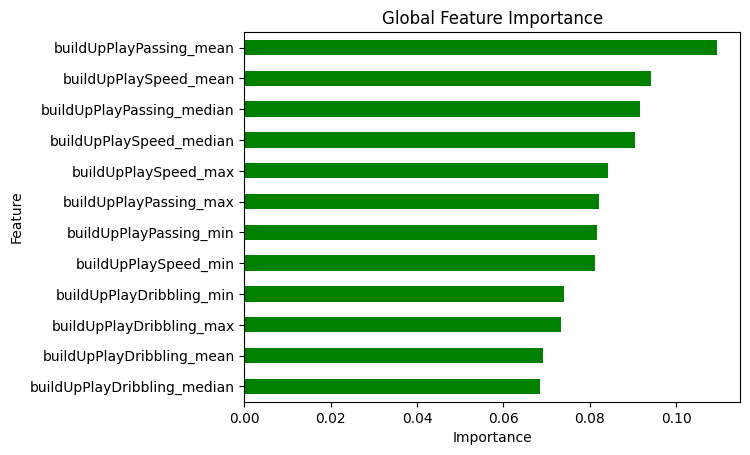

In [ ]:
global_importances = pd.Series(buildup_rf.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance")

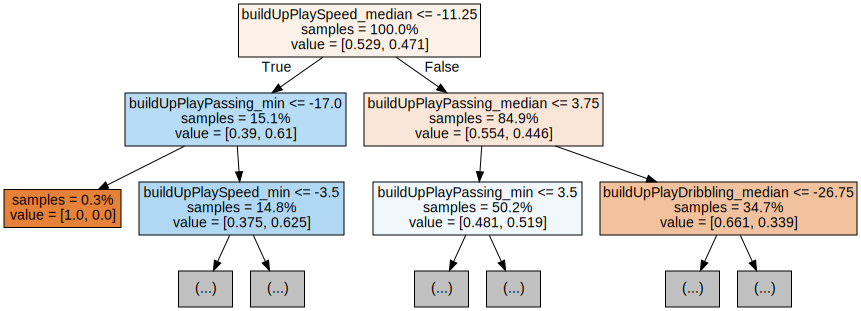

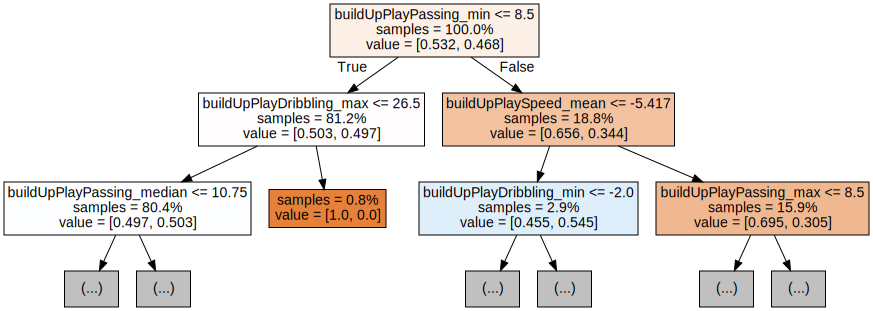

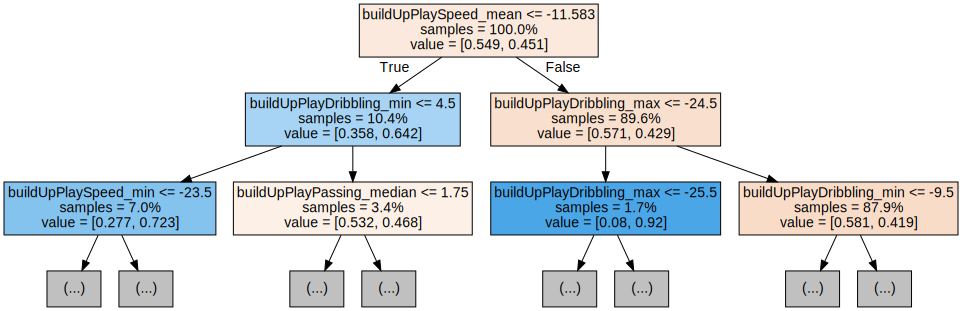

In [78]:
for i in range(3):
    tree = buildup_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)